In [72]:
# Jupyter Notebook Cell 1: Imports and Data Loading

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set default plot style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100  # For higher resolution plots

# Your provided data as a multi-line string
path = "../output/protenn2/v2"
input_path = os.path.join(path, "metrics_df.csv")
output_path = path

# Read the data into a pandas DataFrame
df = pd.read_csv(input_path)

print("DataFrame head:")
print(df.head())
print("\nDataFrame info:")
df

DataFrame head:
   epoch  train_loss  val_loss  train_accuracy  val_accuracy  train_f1_macro  \
0      1    2.764816  1.549030        0.012267      0.068677        0.010085   
1      2    1.289338  1.031824        0.144525      0.269516        0.140341   
2      3    0.875563  0.779858        0.351486      0.387157        0.385470   
3      4    0.664433  0.663154        0.488289      0.477436        0.556358   
4      5    0.553488  0.601832        0.569538      0.521107        0.652321   

   train_precision_macro  train_recall_macro  train_f1_weighted  \
0               0.068640            0.006797           0.017826   
1               0.408387            0.106760           0.184392   
2               0.700028            0.305268           0.433382   
3               0.818357            0.459744           0.584864   
4               0.872621            0.553288           0.667748   

   train_precision_weighted  train_recall_weighted  val_f1_macro  \
0                  0.114766     

,epoch,train_loss,val_loss,train_accuracy,val_accuracy,train_f1_macro,train_precision_macro,train_recall_macro,train_f1_weighted,train_precision_weighted,train_recall_weighted,val_f1_macro,val_precision_macro,val_recall_macro,val_f1_weighted,val_precision_weighted,val_recall_weighted
0,1,2.764816,1.549030,0.012267,0.068677,0.010085,0.068640,0.006797,0.017826,0.114766,0.012267,0.023514,0.087435,0.020191,0.077858,0.273769,0.068677
1,2,1.289338,1.031824,0.144525,0.269516,0.140341,0.408387,0.106760,0.184392,0.450179,0.144525,0.253694,0.554030,0.213764,0.315788,0.629846,0.269516
2,3,0.875563,0.779858,0.351486,0.387157,0.385470,0.700028,0.305268,0.433382,0.714497,0.351486,0.424251,0.744863,0.349320,0.469037,0.784319,0.387157
3,4,0.664433,0.663154,0.488289,0.477436,0.556358,0.818357,0.459744,0.584864,0.829459,0.488289,0.536879,0.805738,0.460133,0.558690,0.829963,0.477436
4,5,0.553488,0.601832,0.569538,0.521107,0.652321,0.872621,0.553288,0.667748,0.881871,0.569538,0.574127,0.824055,0.497951,0.603154,0.845989,0.521107
5,6,0.478478,0.568487,0.619275,0.550050,0.702490,0.903695,0.606525,0.714015,0.908741,0.619275,0.609914,0.844151,0.536808,0.631054,0.869957,0.550050
6,7,0.428425,0.541693,0.656045,0.598230,0.739481,0.920206,0.647790,0.747448,0.924569,0.656045,0.649153,0.846273,0.582260,0.669009,0.866979,0.598230
7,8,0.390440,0.528571,0.686111,0.582018,0.768847,0.933030,0.681021,0.773819,0.937557,0.686111,0.627397,0.864326,0.556214,0.656041,0.880972,0.582018
8,9,0.365678,0.511610,0.703747,0.609122,0.783135,0.940719,0.698815,0.787928,0.944257,0.703747,0.652986,0.854272,0.585758,0.679302,0.873703,0.609122
9,10,0.335908,0.503492,0.724933,0.599827,0.802071,0.951012,0.719867,0.806372,0.953550,0.724933,0.653746,0.860595,0.586464,0.672225,0.883061,0.599827


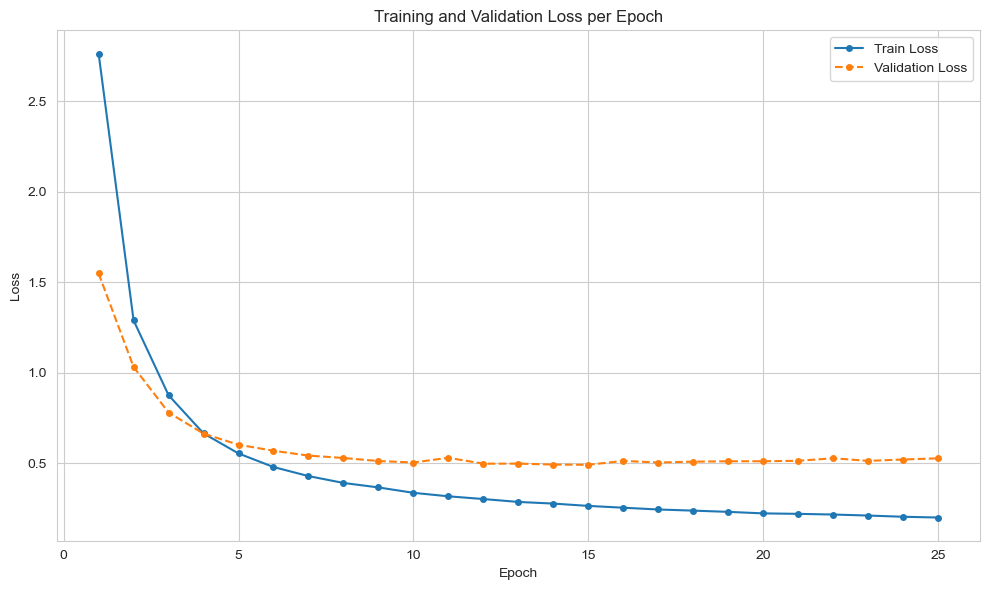

In [73]:
import os

# Jupyter Notebook Cell 2: Loss Curve Plot

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'loss_curve.png'))  # Save as PNG
plt.show()

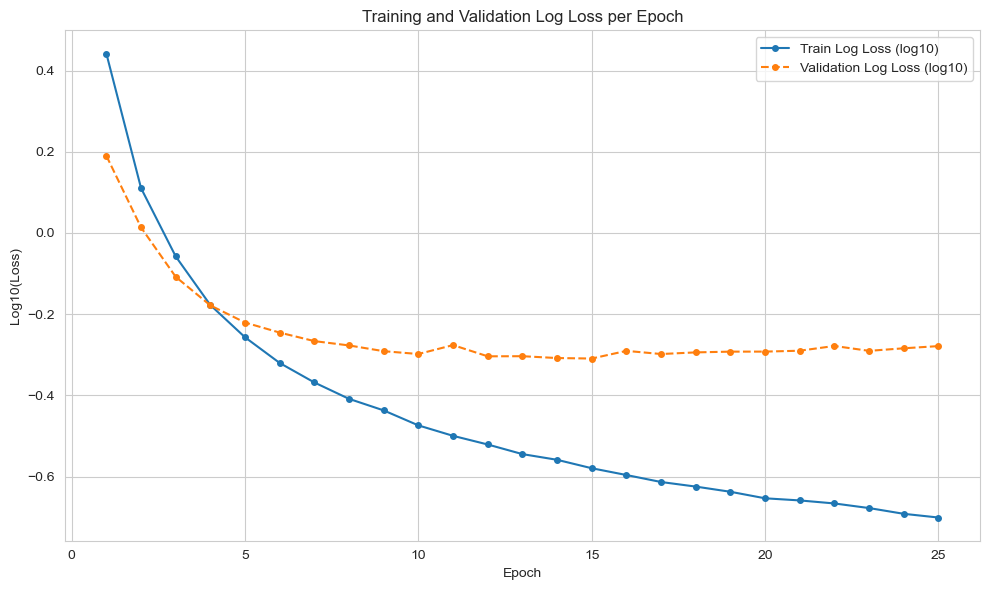

In [74]:
# Jupyter Notebook Cell 3: Log Loss Curve Plot

# Apply log10 to the loss values. Add a small epsilon to avoid log(0) issues if loss hits zero.
epsilon = 1e-9
df['train_log_loss'] = np.log10(df['train_loss'] + epsilon)
df['val_log_loss'] = np.log10(df['val_loss'] + epsilon)

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_log_loss'], label='Train Log Loss (log10)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_log_loss'], label='Validation Log Loss (log10)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Log Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Log10(Loss)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'log_loss_curve.png'))  # Save as PNG
plt.show()

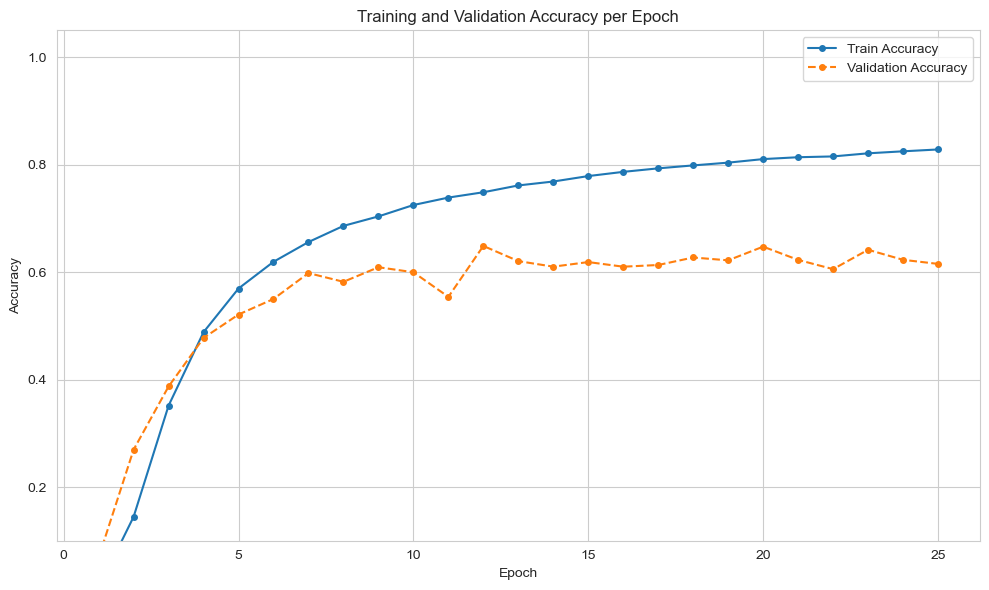

In [75]:
# Jupyter Notebook Cell 4: Accuracy Curve Plot

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_accuracy'], label='Train Accuracy', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(.1, 1.05)  # Accuracy typically ranges from 0 to 1
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'accuracy_curve.png'))
plt.show()

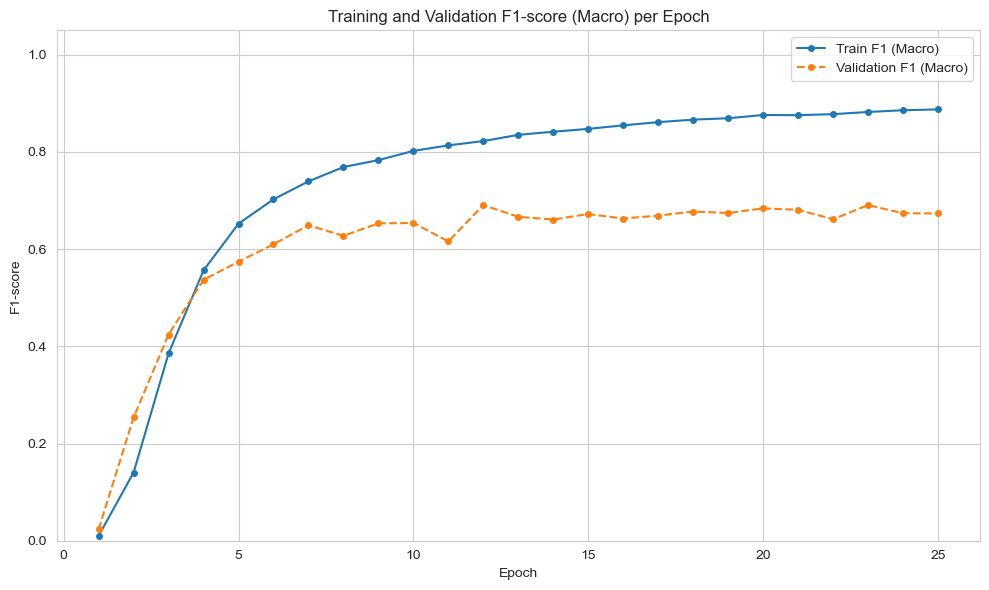

In [76]:
# Jupyter Notebook Cell 5: Placeholder for F1-score and other metrics
plt.figure(figsize=(10, 6))

plt.plot(df['epoch'], df['train_f1_macro'], label='Train F1 (Macro)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_f1_macro'], label='Validation F1 (Macro)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation F1-score (Macro) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'f1_score_macro_curve.png'))
plt.show()

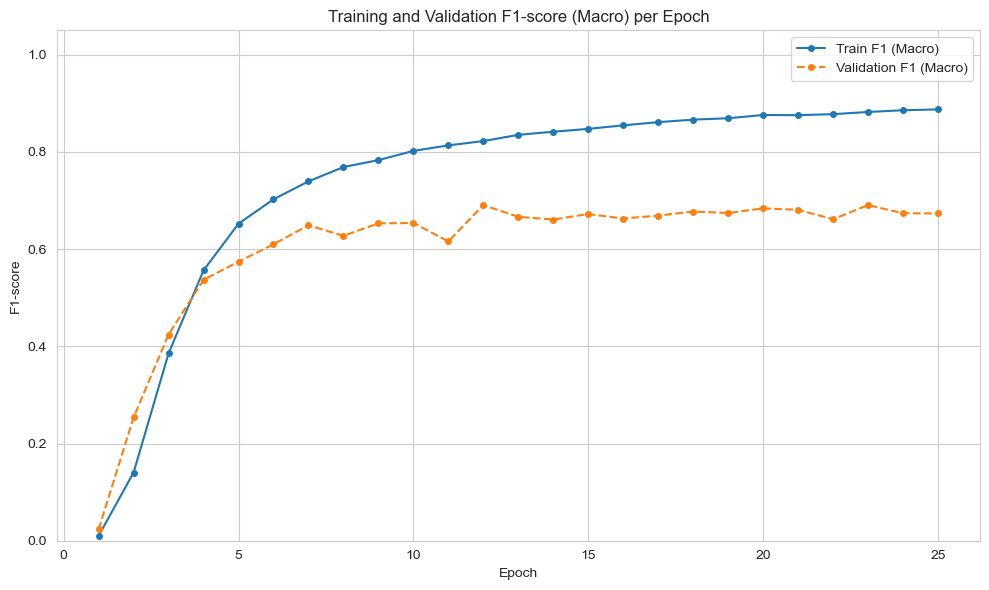

In [77]:
# Jupyter Notebook Cell 5: Placeholder for F1-score and other metrics

# IMPORTANT:
# Your provided data string does *not* contain F1-score or other detailed metrics.
# To plot F1-score, you must:
# 1. Ensure your `calculate_metrics` function in your training script *actually computes and returns* F1-score.
#    (e.g., metrics['f1_macro'] = f1_score(true_labels, predictions, average='macro'))
# 2. Append these F1-scores to dedicated lists in your main training loop
#    (e.g., `train_f1_scores = []`, `val_f1_scores = []`).
# 3. Save these lists to your `metrics_df` DataFrame using `df['train_f1'] = train_f1_scores`, etc.
# 4. Then, you can either:
#    a) Load the saved `metrics_df.csv` (see Cell 6)
#    b) Re-run your training script to generate the full data in the notebook if you integrate everything here.

# For now, let's create dummy F1-score data to demonstrate the plotting
# Replace this with your actual loaded/computed F1 scores once available
# Assuming F1 scores are similar to accuracy for this example

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_f1_macro'], label='Train F1 (Macro)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_f1_macro'], label='Validation F1 (Macro)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation F1-score (Macro) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

In [78]:
# Jupyter Notebook Cell 6: Example of Loading from CSV (if you save your DataFrame)

# Assuming you've run your training script and saved the metrics_df to a CSV:
# metrics_df.to_csv(os.path.join(output_path, 'metrics_df.csv'), index=False)

# To load it later in a new notebook session:
# import pandas as pd
# import os # You might need this if your path is relative

# file_path = 'path/to/your/output_folder/metrics_df.csv' # Replace with your actual path
# if os.path.exists(file_path):
#     loaded_df = pd.read_csv(file_path)
#     print("Loaded DataFrame head:")
#     print(loaded_df.head())
#     # You can then use loaded_df for all the plotting cells above
# else:
#     print(f"File not found at: {file_path}. Make sure to run your training script first.")